In [12]:
# Imports
import os

# Third-party imports
import pandas as pd
from dotenv import load_dotenv

import functions as f

In [13]:
# Load environment variables (stuff that doesn't change often)
load_dotenv()

API_KEY = os.getenv('FMPKEY')   

RF = (lambda x: x[0]["month3"] / 100)(f.get_treasury_data(API_KEY))  # 3 Month Treasury Rate

NUMBER_OF_PORTFOLIOS = 100  # Number of portfolios to simulate

TRADING_DAYS = 252  # Number of trading days in a year

In [14]:
# These need to be prompted at each run
current_portfolio = pd.read_csv('C:/Users/thomas.higginbotham/OneDrive/PortfolioMagic/portfolio.csv')
#current_portfolio = pd.read_csv('/Users/thomashigginbotham/Library/CloudStorage/OneDrive-Personal/PortfolioMagic/portfolio.csv')

STOCKS = [
    'FTEC', 'SPYG', 'MTUM', 'SGDJ', 'FLSW', 'SPSM', 'EFV', 'USMV', 'IVE',
    'EELV', 'EFG', 'IFRA', 'DBO', 'DBE', 'USCI', 'SCHX', 'SCHA', 'SPDW',
    'EOG', 'MET', 'NVDA', 'TSLA',
    'XES', 'XLE', 'VDE', 'XOP', 'XLB', 'SQQQ',
    'NVDL', 'FBL', 'FNGU', 'BULZ', 'FNGO'
]

ACCT = 7844.35   # Account balance
RISK = 0.2  # Risk tolerance
NUMBER_OF_DAYS = 300  # Number of days to simulate (history)

In [15]:
# Get the price history for all stocks and ETFs
stock_history = f.get_stock_history(STOCKS, NUMBER_OF_DAYS, API_KEY)

In [16]:
# Get the daily return (price difference) for all stocks and ETFs
return_stocks = f.get_return_stocks(stock_history)

In [17]:
portfolio_dfs = f.get_montecarlo_simulation(NUMBER_OF_PORTFOLIOS, STOCKS, return_stocks, TRADING_DAYS, RF, RISK)

In [18]:
recommendations = f.get_recommendations(portfolio_dfs, current_portfolio, ACCT, STOCKS, stock_history)

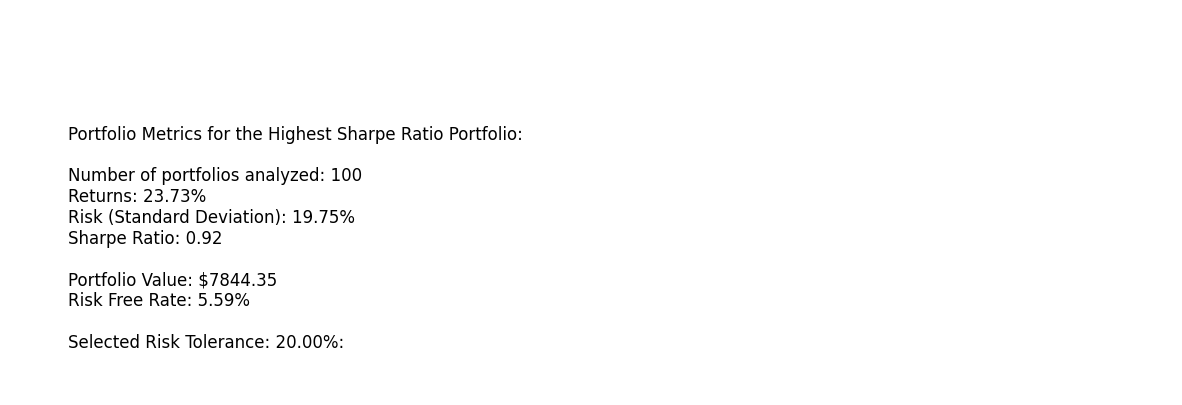

In [19]:
f.plot_portfolio_metrics(portfolio_dfs, NUMBER_OF_PORTFOLIOS, ACCT, RF, RISK)

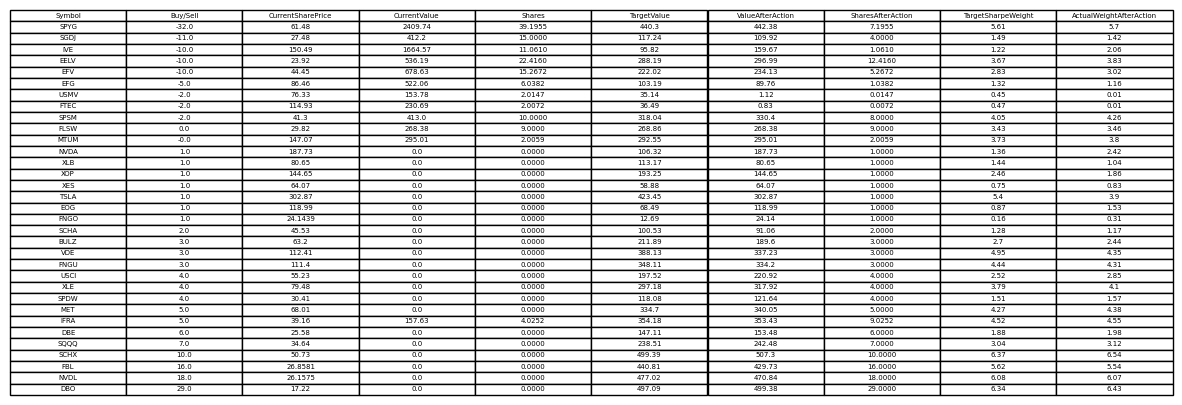

In [20]:
f.plot_portfolio_changes(recommendations)

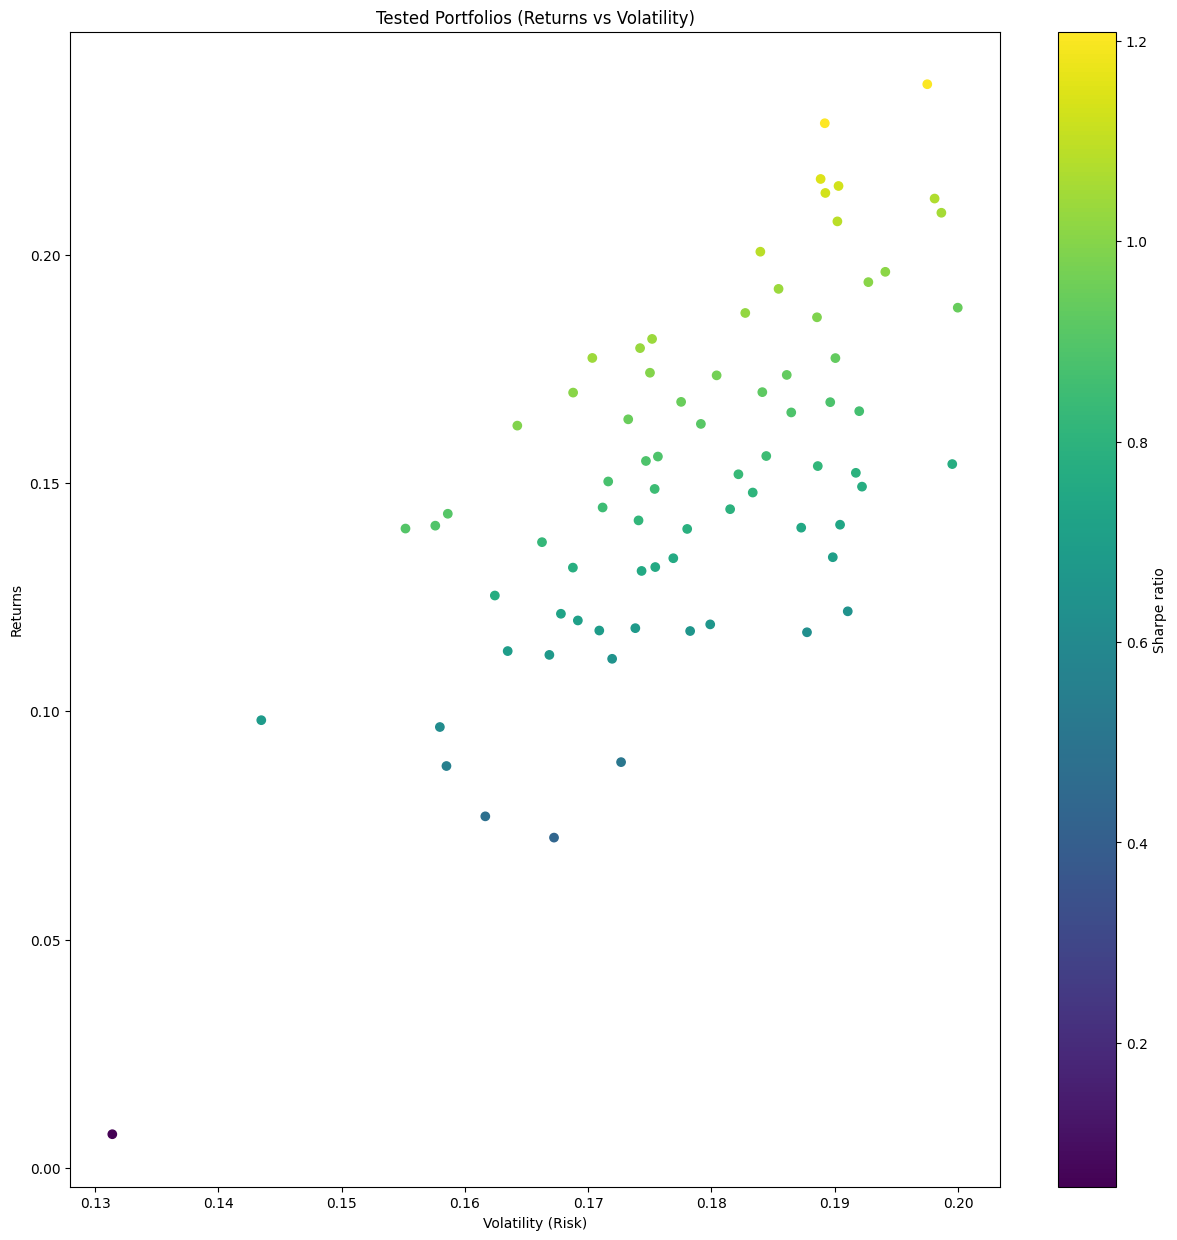

In [21]:
f.plot_risk_scatterplot(portfolio_dfs)

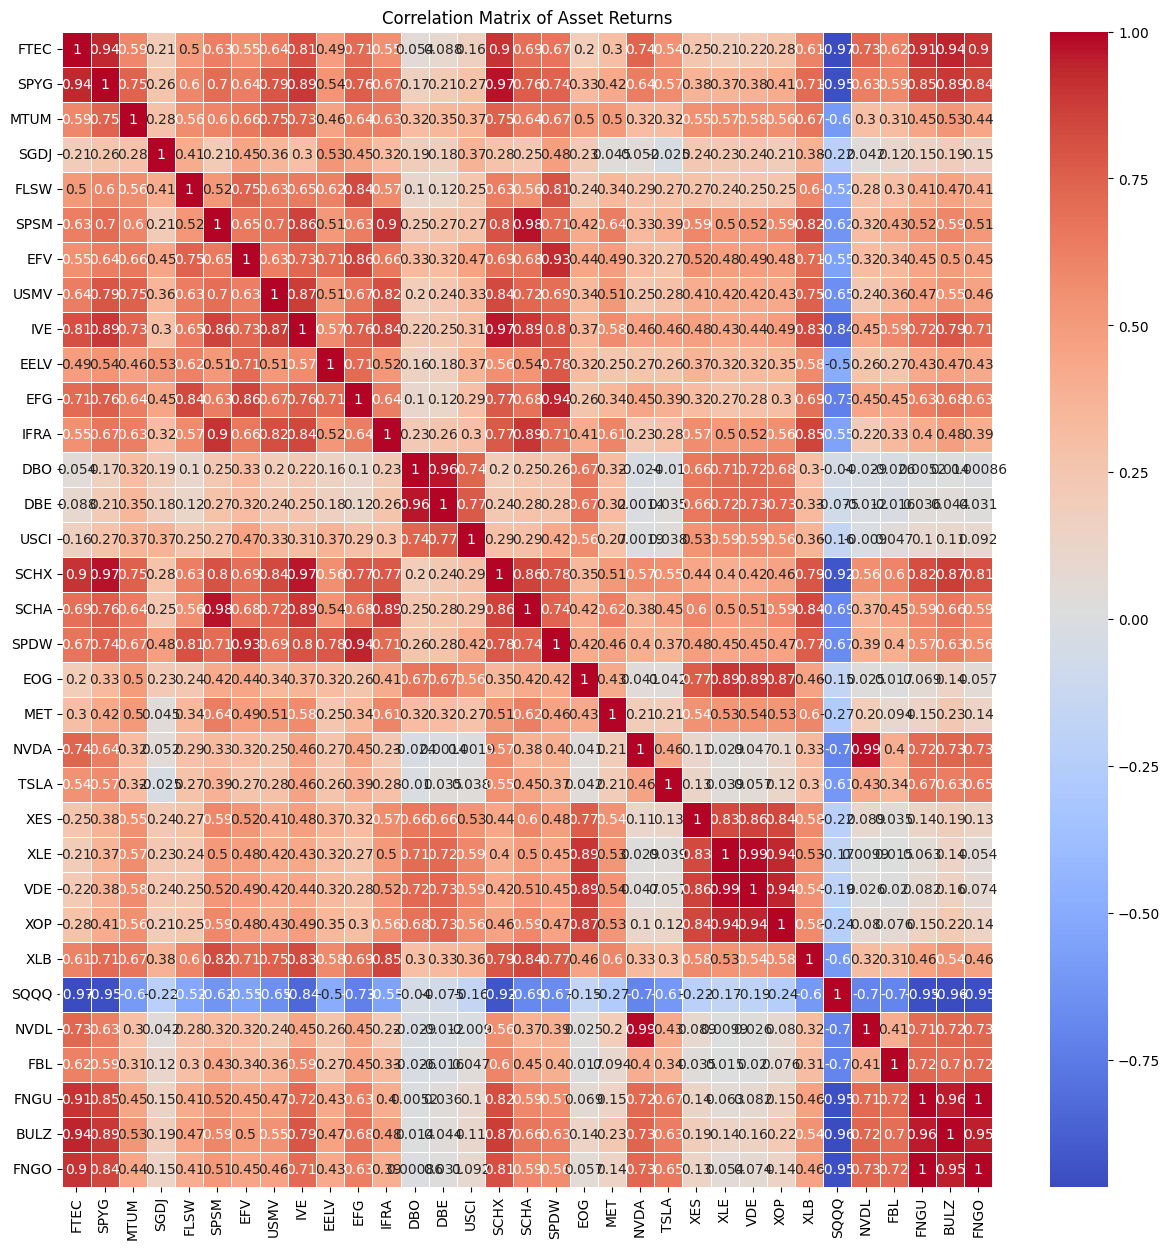

In [22]:
f.plot_correlation_matrix(return_stocks)